In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import time

def imshow(line, col, title, image):
#     print('ndim = ', image.shape[2])
    if  image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA)
    ax[line, col].imshow(image)
    ax[line, col].set_title(title)
    
def plot(line, col, title, xAxis, yAxis):
    ax[line, col].plot(xAxis, yAxis)
    ax[line, col].set_title(title)

def boolrand():
    return (random.randint(0,1))

['1 0.085938 0.184375 0.125 0.1', '1 0.228906 0.239844 0.160938 0.210938', '1 0.201563 0.400781 0.10625 0.110937', '1 0.210938 0.50625 0.125 0.1', '1 0.357812 0.520312 0.16875 0.128125', '1 0.503906 0.505469 0.123438 0.098437', '1 0.634375 0.547656 0.1375 0.182812', '0 0.76875 0.508594 0.13125 0.104688', '0 0.760938 0.604688 0.115625 0.0875', '1 0.879687 0.577344 0.121875 0.032813', '1 0.876563 0.66875 0.115625 0.15', '1 0.890625 0.838281 0.14375 0.189062']
type , x, y, w, h 1 15 86 80 64
type , x, y, w, h 1 94 85 103 135
type , x, y, w, h 1 95 221 68 70
type , x, y, w, h 1 95 292 80 64
type , x, y, w, h 1 174 291 108 82
type , x, y, w, h 1 282 292 79 62
type , x, y, w, h 1 362 292 88 116
type , x, y, w, h 0 450 291 84 67
type , x, y, w, h 0 450 359 74 56
type , x, y, w, h 1 523 358 78 21
type , x, y, w, h 1 524 380 74 96
type , x, y, w, h 1 524 476 92 120


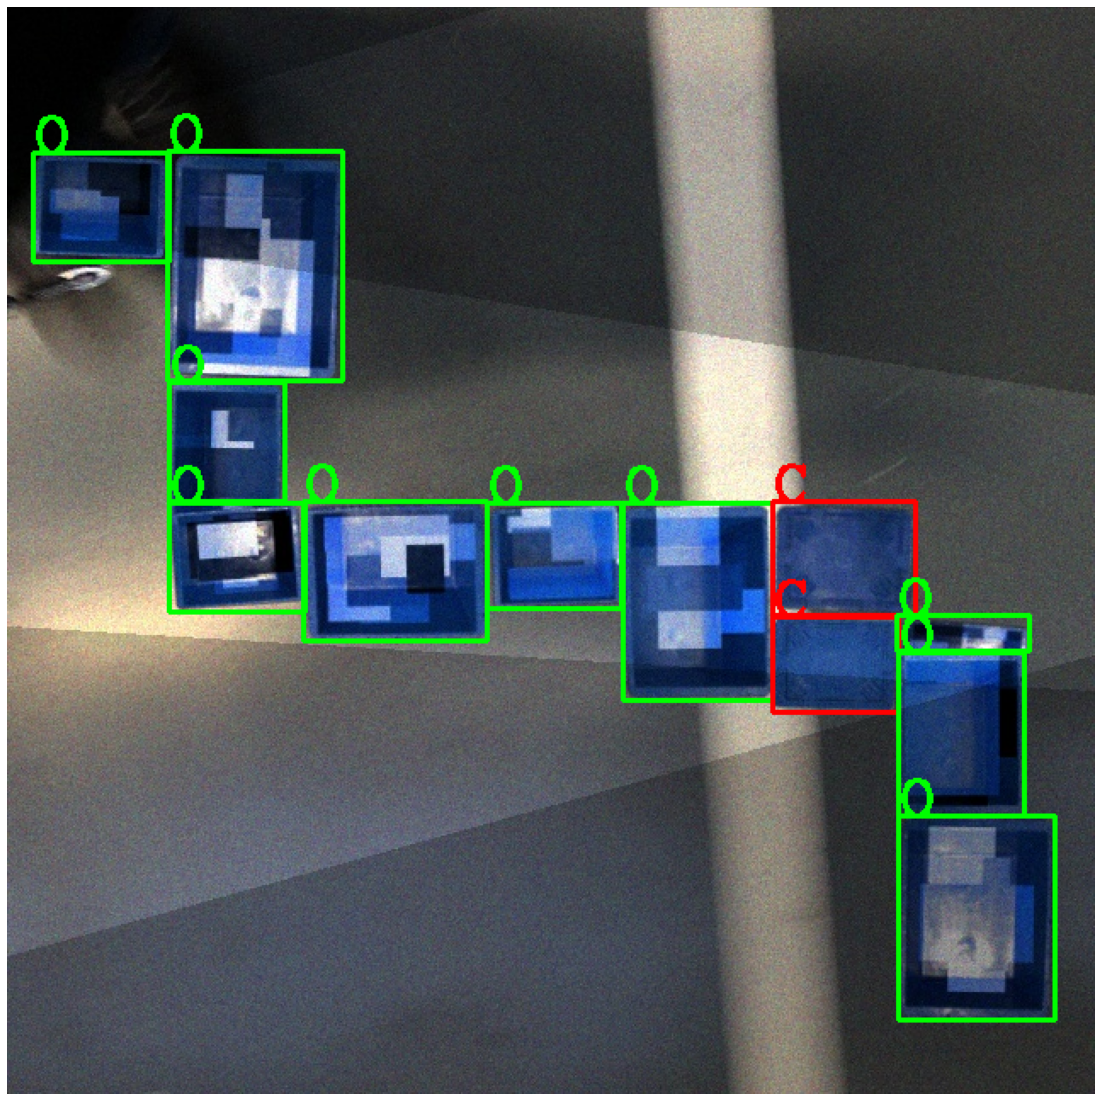

In [22]:
sub = 'train'    #train, val
base_dir_img = 'images'
base_dir_lbl = 'labels'
File = 'pic.0'
# File = 'IMG_3670_JPG.rf.010c07476e93588442bfb5236e9dc1ad'
imgFile = File + '.jpg'
txtFile = File + '.txt'

img = cv2.imread(os.path.join(base_dir_img, sub, imgFile))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(hImg, wImg) = img.shape[:2]

annotations = open(os.path.join(base_dir_lbl, sub, txtFile)).read().splitlines()
print(annotations)
for box in annotations:
    content = box.split()
    boxType = int(content[0])
    x = int(float(content[1]) * wImg)  # center of box
    y = int(float(content[2])*hImg)   # center of box
    w = int(float(content[3])*wImg)
    h = int(float(content[4])*hImg)
    
    x = int(x-w/2)
    y = int (y-h/2)
    if boxType ==0 :     #closedbox
        cv2.rectangle(img, (x, y), (x + w, y + h), (255,0,0), 2)
        cv2.putText(img, 'C', (x, y), cv2.FONT_HERSHEY_COMPLEX, fontScale = 1, color= (255,0,0), thickness = 2)
    else:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0,255,0), 2)
        cv2.putText(img, 'O', (x, y), cv2.FONT_HERSHEY_COMPLEX, fontScale = 1, color= (0,255,0), thickness = 2)
    print("type , x, y, w, h",str(boxType), x, y, w, h)          
fig, ax = plt.subplots(figsize=(30, 20))
ax.imshow(img)
# ax.imshow(weights, extent=(xmin, xmax, ymin, ymax), cmap=cmap)
ax.set_axis_off()

plt.show()